In [318]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import FormatStrFormatter

sns.set_theme()
save_fig = True

In [319]:
def load_optims(zad_id):
    optimums = pd.read_csv(f'../Results/zad_{zad_id}_optims.csv', sep=';')
    return optimums

In [320]:
def plot_metrics_boxplot(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(1, len(problem_names), figsize=(18, 4))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            data_to_plot = []
            models = []
            for gr_id, (group_name, group) in enumerate(groupby):
                genes_groups = group.sort_values(['genes']).groupby('genes')
                x = list(genes_groups.genes.groups.keys())#.tolist()
                y = genes_groups[metric].median().tolist()
                # print(x, y)
                model_name = model_names[group_name]
                ax[index].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                ax[index].set_title(problem_name)
                ax[index].legend()
                
                ax[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                ax[index].set_xlabel('Liczba genów')
                #ax[index].set_ylabel(f'Mediana {metric}')
                
                
            ax[index].boxplot(data_to_plot)
            ax[index].set_title(problem_name)
            ax[index].legend()
            ax[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            print(models)
            ax[index].set_xticks(np.arange(1, len(models) + 1, 1), models)
            ax[index].set_xlabel('Metoda')
            
#                 if metric == 'bestValue':
#                     optimums = load_optims(zad_id)
#                     opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
#                     groupby = opts.sort_values(['genes']).groupby(['genes']).median()
#                     opts = groupby.maxVal

                    # ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Plots/lab4zad1_{metric}.jpg')
        else:
            print(metric)
            plt.show()

## LAB4ZAD1

In [321]:
def plot_metrics_4_1_line(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            x_ticks = []
            data_to_plot = []
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                x_ticks.append(x[0])
                y = param_groups[metric].median().tolist()
                #model_name = model_names[group_name]
                x = gr_id
                data_to_plot.append(y)
                
            ax[index//3, index%3].plot(x_ticks, data_to_plot, 'o-', linewidth=2, markersize=7)
            ax[index//3, index%3].set_title(problem_name)
            #ax[index].legend()

            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax[index//3, index%3].set_xticks(x_ticks, rotation = 60)
            #ax[index].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xlabel('Rozmiar populacji')
            ax[index//3, index%3].set_ylabel(f'Mediana {metric}')
            
            if metric == 'bestValue':
                optimums = load_optims(zad_id)
                opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                opts = groupby.maxVal

                ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')
                #ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Results/Plots/lab4zad1_{metric}.jpg')
        else:
            print(metric)
            plt.show()

In [322]:
def plot_metrics_4_1(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            x_ticks = []
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                x_ticks.append(x[0])
                
                y = param_groups[metric].median().tolist()
                #model_name = model_names[group_name]
                ax[index//3, index%3].plot(x, y, f'{markers[gr_id]}-', linewidth=2, markersize=7)
            ax[index//3, index%3].set_title(problem_name)
            #ax[index].legend()

            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax[index//3, index%3].set_xticks(x_ticks, rotation = 60)
            #ax[index].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xticklabels(x_ticks, rotation = 45)
            ax[index//3, index%3].set_xlabel('Rozmiar populacji')
            ax[index//3, index%3].set_ylabel(f'Mediana {metric}')
            
            if metric == 'bestValue':
                optimums = load_optims(zad_id)
                opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                opts = groupby.maxVal

                ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')
                #ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Results/Plots/lab4zad1_{metric}.jpg')
        else:
            print(metric)
            plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Results/zad_41_Max3SAT.csv'

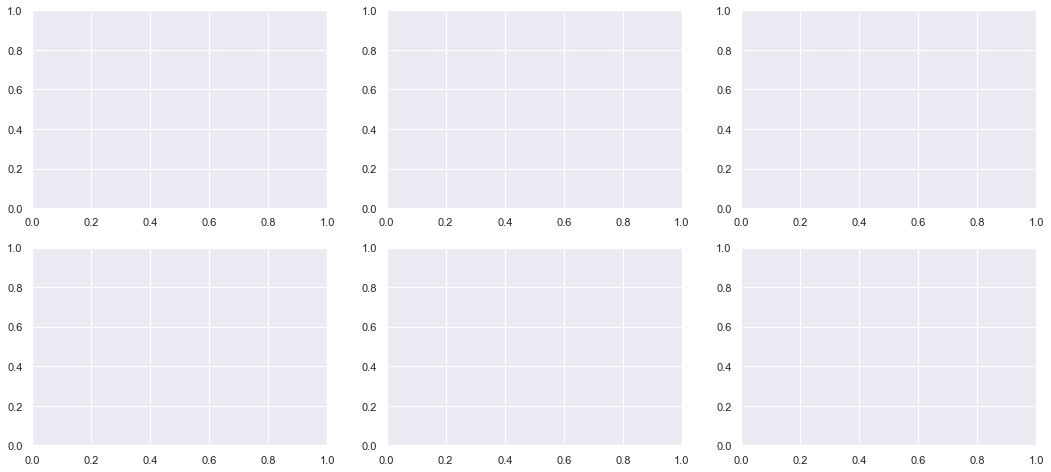

In [323]:
problem_names = {'Max3SAT': 'Max3SAT', 
                 'ISG': 'ISG',
                 'NKLandscapes': 'NK-land',
                 'Concatenation_10': 'Concatenation_10',
                 'Concatenation_50': 'Concatenation_50',
                 'Concatenation_100': 'Concatenation_100',
                }


model_names = {
    10: 10,
    50: 50,
    100: 100,
    200: 200,
    500: 500,
    1000: 1000,
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']


#plot_metrics_4_1(41, problem_names, model_names, metrics)
plot_metrics_4_1_line(41, problem_names, model_names, metrics)


## LAB 4 ZAD 2

In [ ]:
from matplotlib.patches import Rectangle
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

def plot_metrics_4_2(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['param1', 'param2'])
            results = np.zeros(shape=(11, 11))
            
            for gr_id, ((crossProb, mutProb), group) in enumerate(groupby):
                param_groups = group.sort_values(['param1', 'param2']).groupby(['param1', 'param2'])
                x = crossProb
                y = mutProb
                results[int(10*x), int(10*y)] = round(param_groups[metric].median().tolist()[0], 2)
            labels = np.arange(0, 1.1, 0.1).tolist()
            labels = [round(x, 1) for x in labels]
            results = pd.DataFrame(results, index = labels, columns = labels)

            g = sns.heatmap(results, annot=True, annot_kws={"fontsize": 11}, fmt='g', cmap="YlOrBr_r", ax=ax[index//3, index%3])
            
            column_max = results.idxmax(axis=0)
            best_res = -123456 #15235235
            BESTS = []
            for col, variable in enumerate(labels):
                position = results.index.get_loc(column_max[variable])
                if best_res < results.iloc[position, col]:
                    best_ids = (col, position)
                    best_res =  results.iloc[position, col]
                    BESTS = []
                    BESTS.append(best_ids)
                elif best_res == results.iloc[position, col]:
                    BESTS.append(best_ids)
            
            for best_ids in BESTS:
                ax[index//3, index%3].add_patch(Rectangle(best_ids, 1, 1, fill=False, edgecolor='red', lw=3))
            ax[index//3, index%3].set_xlabel('Prawdopodobienstwo mutacji')
            ax[index//3, index%3].set_ylabel('Prawdopodobienstwo krzyzowania')


        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Results/Plots/lab4zad2_{metric}.jpg')
        else:
            print(metric)
            plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Results/zad_42_Max3SAT.csv'

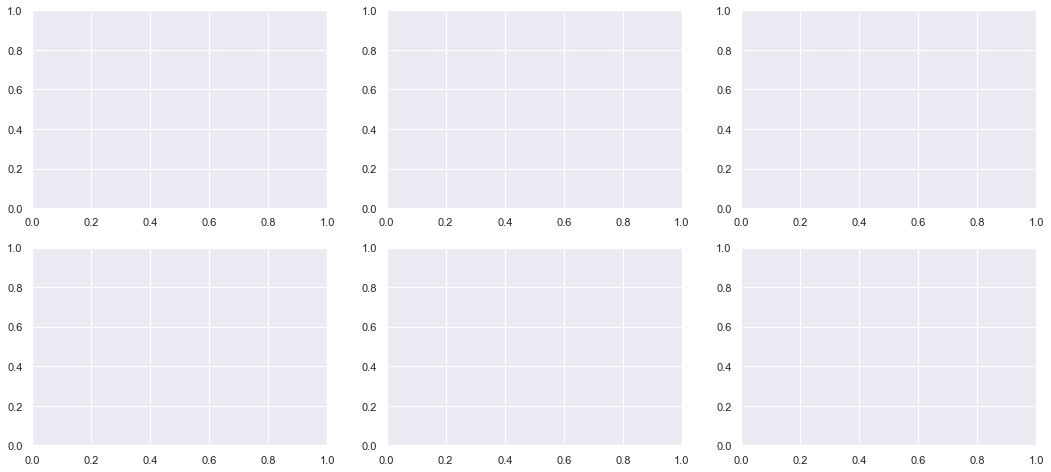

In [324]:
problem_names = {'Max3SAT': 'Max3SAT', 
                 'ISG': 'ISG',
                 'NKLandscapes': 'NK-land',
                 'Concatenation_10': 'Concatenation_10',
                 'Concatenation_50': 'Concatenation_50',
                 'Concatenation_100': 'Concatenation_100',
                }


model_names = {
    10: 10,
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics_4_2(42, problem_names, model_names, metrics)

## LAB 5 ZAD 1 i 2

In [355]:
def plot_metrics_boxplot(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))
            df.param1 = 1
            df.param2 = 1
            groupby = df.groupby(['method'])
            
            data_to_plot = []
            models = []
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                y = param_groups[metric].median().tolist()
                #print(x, y)
                model_name = model_names[group_name]
                
                x = gr_id
                data_to_plot.append(param_groups[metric].apply(list).iloc[0])
                models.append(model_name)
                #ax[index//3, index%3].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                #ax[index//3, index%3].set_title(problem_name)
                #ax[index//3, index%3].legend()
                
                #ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                #ax[index//3, index%3].set_xlabel('Liczba genów')
                #ax[index].set_ylabel(f'Mediana {metric}')
                
            ax[index//3, index%3].boxplot(data_to_plot, medianprops = dict(linewidth=6))
            ax[index//3, index%3].set_title(problem_name)
            ax[index//3, index%3].legend()
            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax[index//3, index%3].set_xticks(np.arange(1, len(models) + 1, 1), models)
            ax[index//3, index%3].set_xlabel('Metoda')
            
            if metric == 'bestValue':
                optimums = load_optims(zad_id)
                opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                opts = groupby.maxVal

                ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Results/Plots/lab5zad1_{metric}.jpg')
        else:
            print(metric)
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

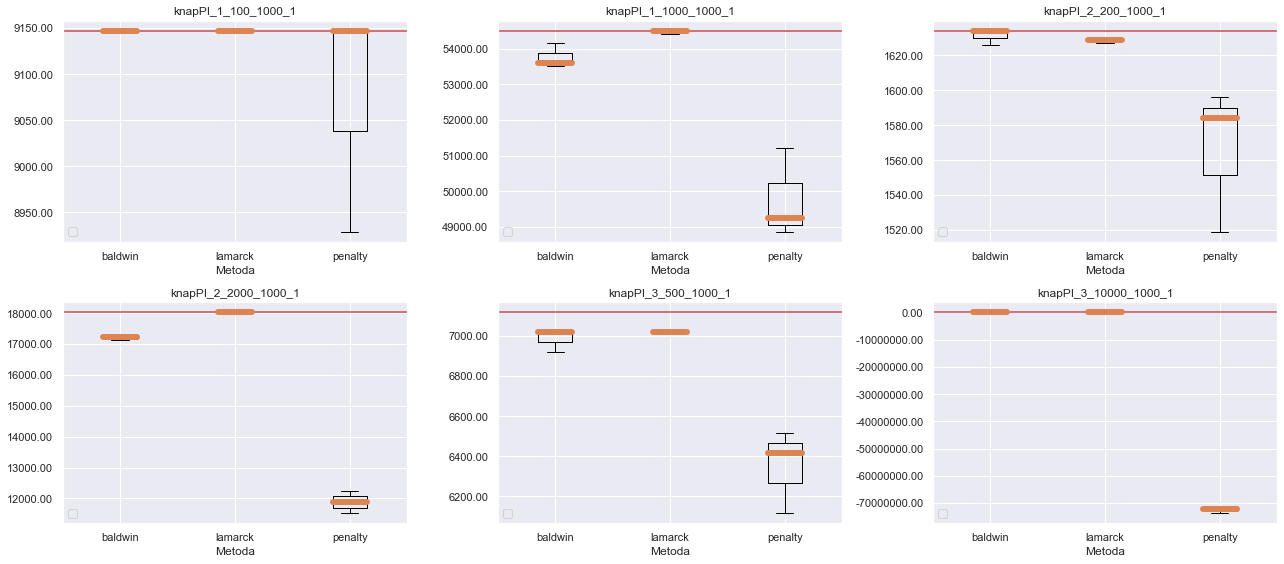

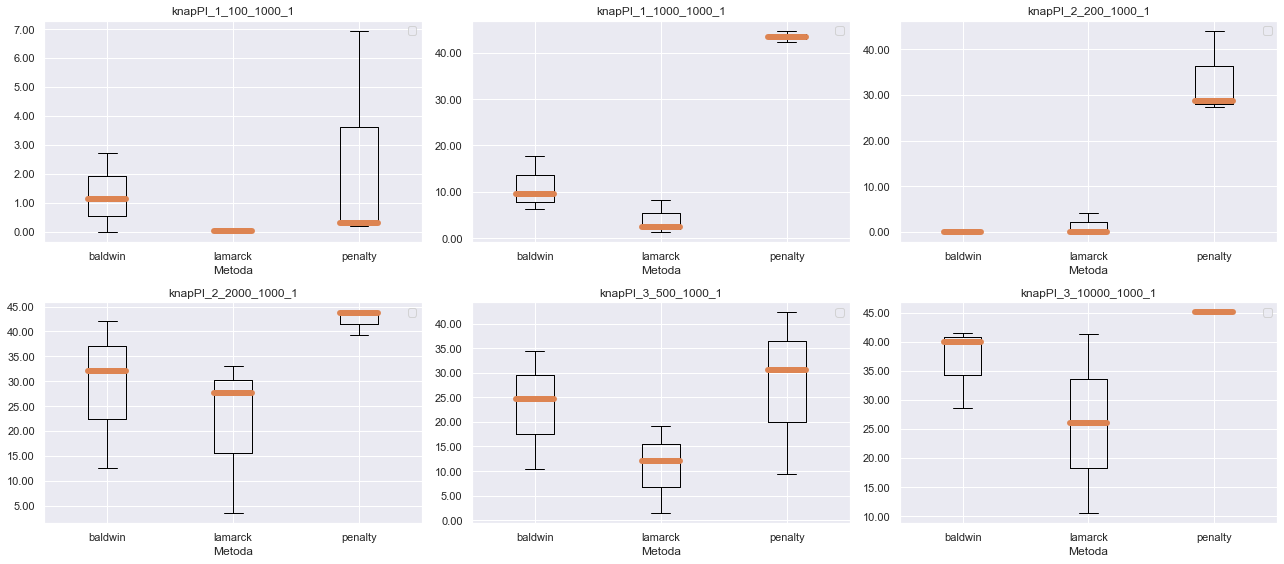

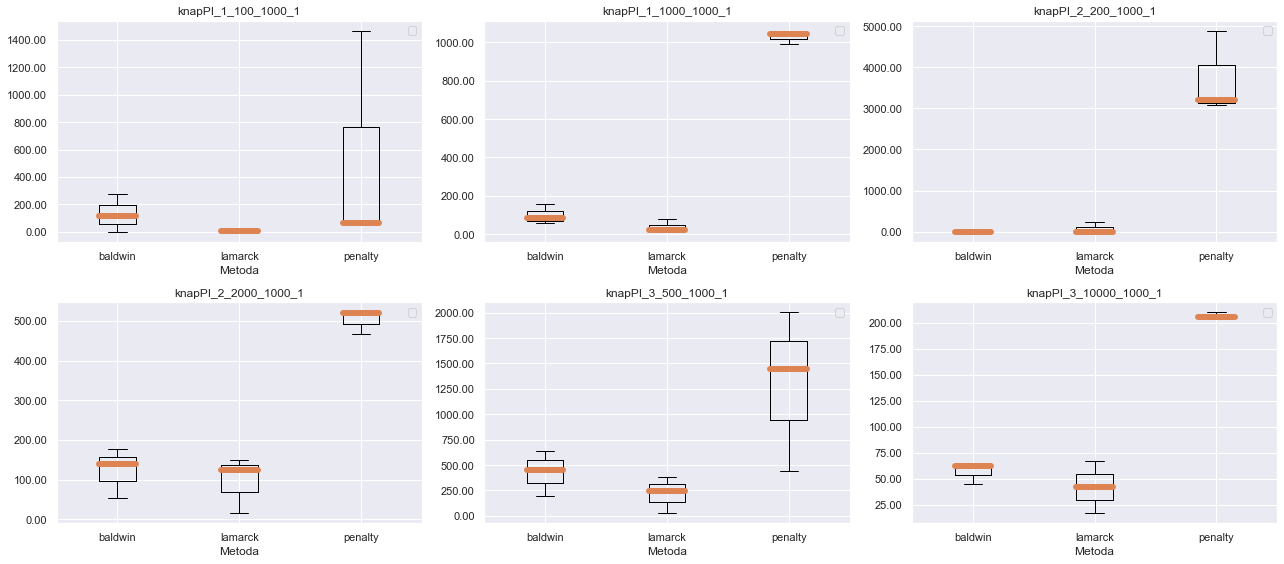

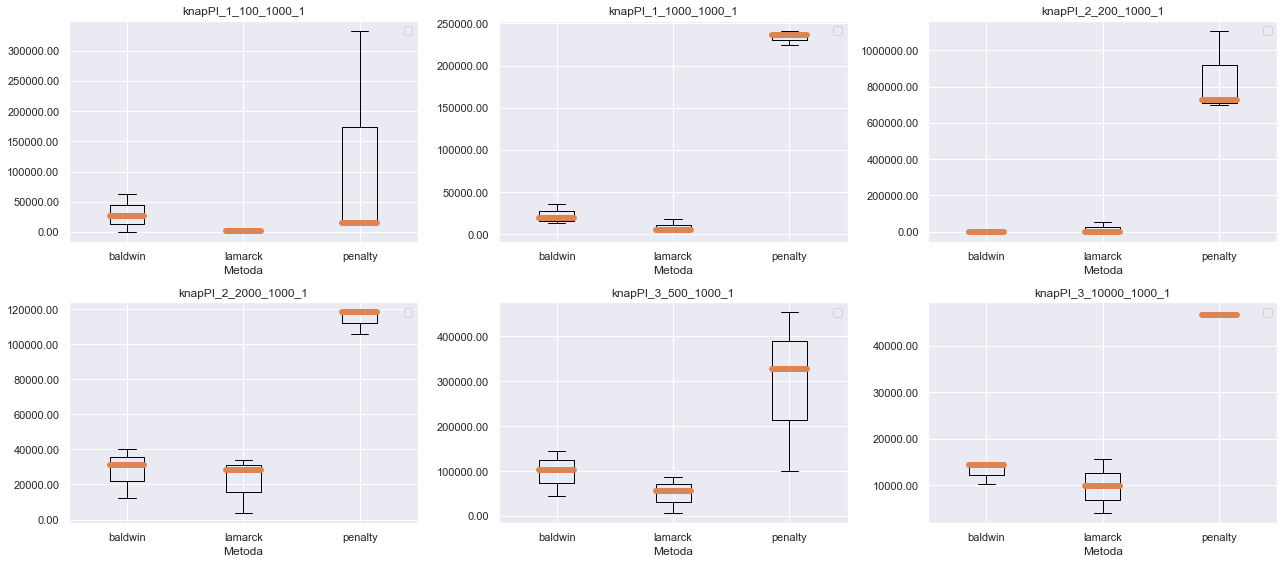

In [360]:
problem_names = {'knapPI_1_100_1000_1': 'knapPI_1_100_1000_1', 
                 'knapPI_1_1000_1000_1': 'knapPI_1_1000_1000_1',
                 'knapPI_2_200_1000_1': 'knapPI_2_200_1000_1',
                 'knapPI_2_2000_1000_1': 'knapPI_2_2000_1000_1',
                 'knapPI_3_500_1000_1': 'knapPI_3_500_1000_1',
                 'knapPI_3_5000_1000_1': 'knapPI_3_10000_1000_1',
                 }
# problem_names = {'knapPI_1_100_1000_1': 'knapPI_1_100_1000_1', 
#                  'knapPI_1_1000_1000_1': 'knapPI_1_1000_1000_1',
#                  'knapPI_2_200_1000_1': 'knapPI_2_200_1000_1',
#                  'knapPI_3_100_1000_1': 'knapPI_3_100_1000_1',
#                  'knapPI_3_500_1000_1': 'knapPI_3_500_1000_1'
#                 }

# problem_names = {'knapPI_1_100_1000_1': 'knapPI_1_100_1000_1', 
#                  'knapPI_2_200_1000_1': 'knapPI_2_200_1000_1',
#                  'knapPI_3_500_1000_1': 'knapPI_3_500_1000_1'
#                 }

model_names = {
    'penalty': 'penalty',
    'lamarck': 'lamarck',
    'baldwin': 'baldwin',
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics_boxplot(5, problem_names, model_names, metrics)


## Lab 6 Zad 1/3

In [366]:
def plot_metrics_6_3_line(zad_id, problem_names, model_names, metrics):
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))
    for index, (problem_k, problem_name) in enumerate(problem_names.items()):
        df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
        # print(df.head(1))

        groupby = df.groupby(['method'])
        x_ticks = []
        best = []
        worst = []
        mean = []
        for gr_id, (group_name, group) in enumerate(groupby):
            param_groups = group.sort_values(['iteration']).groupby('iteration')
            x = list(param_groups['iteration'].groups.keys())#.tolist()
            x_ticks = x
            best.append(param_groups['best'].median().tolist())
            worst.append(param_groups['worst'].median().tolist())
            mean.append(param_groups['mean'].median().tolist())
            #model_name = model_names[group_name]
            #x = gr_id

        #print(x, best)
        ax[index//3, index%3].plot(x_ticks, mean[0], 'o-', linewidth=2, markersize=2)
        ax[index//3, index%3].plot(x_ticks, best[0], 'o-', linewidth=2, markersize=2)
        ax[index//3, index%3].plot(x_ticks, worst[0], 'o-', linewidth=2, markersize=2)
        ax[index//3, index%3].set_title(problem_name)
        #ax[index].legend()

        ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax[index//3, index%3].set_xticks([xd for xd in x_ticks if xd % 10 == 0], rotation = 60)
        #ax[index].set_xticklabels(x_ticks, rotation = 45)
        #ax[index//3, index%3].set_xticklabels(x_ticks, rotation = 45)
        ax[index//3, index%3].set_xlabel('Nr iteracji')
        ax[index//3, index%3].set_ylabel(f'Mediana BestValue')

#         optimums = load_optims(zad_id)
#         opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
#         groupby = opts.sort_values(['genes']).groupby(['genes']).median()
#         opts = groupby.maxVal

        # ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')
        #ax[index].scatter(x, opts, marker='x', s=200)

    # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
    fig.tight_layout()
    if save_fig:
        plt.savefig(f'../Results/Plots/lab6zad3_utykanie.jpg')
    else:
        #print(metric)
        plt.show()

ValueError: x and y must have same first dimension, but have shapes (15034,) and (25040,)

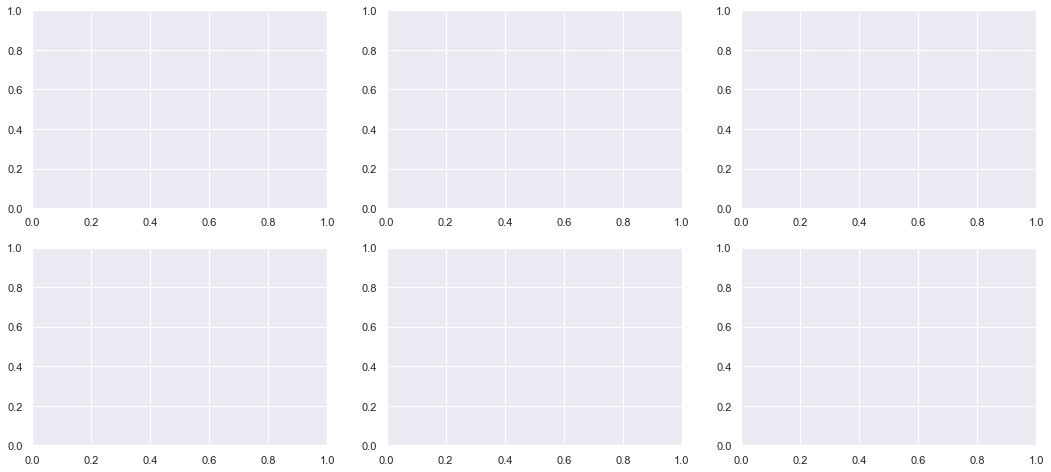

In [367]:
problem_names = {'CBinaryMax3SatEvaluation_100_utykanie': 'Max3SAT', 
                 'CBinaryIsingSpinGlassEvaluation_100_utykanie': 'ISG',
                 'CBinaryNKLandscapesEvaluation_100_utykanie': 'NK-land',
                 'CBinaryStandardDeceptiveConcatenationEvaluation_30_utykanie': 'Concatenation_10',
                 'CBinaryStandardDeceptiveConcatenationEvaluation_150_utykanie': 'Concatenation_50',
                 'CBinaryStandardDeceptiveConcatenationEvaluation_300_utykanie': 'Concatenation_100',
                }


model_names = {
    'island': 'island'
}

metrics = ['best', 'worst', 'mean']


#plot_metrics_4_1(41, problem_names, model_names, metrics)
plot_metrics_6_3_line(63, problem_names, model_names, metrics)


## Lab 6 Zad 3

In [ ]:
def plot_metrics_boxplot(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P', 'x']
    for metric in metrics:
        fig, ax = plt.subplots(2, 3, figsize=(18, 8))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))
            df.param1 = 1
            df.param2 = 1
            groupby = df.groupby(['method'])
            
            data_to_plot = []
            models = []
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                y = param_groups[metric].median().tolist()
                #print(x, y)
                model_name = model_names[group_name]
                
                x = gr_id
                data_to_plot.append(param_groups[metric].apply(list).iloc[0])
                models.append(model_name)
                #ax[index//3, index%3].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                #ax[index//3, index%3].set_title(problem_name)
                #ax[index//3, index%3].legend()
                
                #ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                #ax[index//3, index%3].set_xlabel('Liczba genów')
                #ax[index].set_ylabel(f'Me|diana {metric}')
                
                
            ax[index//3, index%3].boxplot(data_to_plot)
            ax[index//3, index%3].set_title(problem_name)
            ax[index//3, index%3].legend()
            ax[index//3, index%3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax[index//3, index%3].set_xticks(np.arange(1, len(models) + 1, 1), models)
            ax[index//3, index%3].set_xlabel('Metoda')
            
            if metric == 'bestValue':
                optimums = load_optims(zad_id)
                opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                opts = groupby.maxVal

                ax[index//3, index%3].axhline(y=opts.iloc[0], color='r', linestyle='-')

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Plots/zad_{zad_id}_{problem_k}_{metric}.jpg')
        else:
            print(metric)
            plt.show()

In [ ]:
problem_names = {'Max3SAT': 'Max3SAT', 
                 'ISG': 'ISG',
                 'NKLandscapes': 'NK-land',
                 'Concatenation_10': 'Concatenation_10',
                 'Concatenation_50': 'Concatenation_50',
                 'Concatenation_100': 'Concatenation_100',
                }

model_names = {
    'lab6zad3': 'default', 
    'island_N1_M1000': 'island_N1_M1000',
    'island_N2_M50': 'island_N2_M50',
    'island_N4_M15': 'island_N4_M15',
    'island_N4_M5': 'island_N4_M5',
    'island_N10_M2': 'Island (10, 2)',
    'island_N10_M5': 'Island (10, 5)',
    'island_N10_M10': 'Island (10, 10)',
    'island_N10_M15': 'Island (10, 15)'
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics_boxplot(63, problem_names, model_names, metrics)


## Lab 7 zad 1

In [67]:
def plot_metrics(zad_id, problem_names, model_names, metrics):
    markers = ['o', 's', 'v', 'D', 'P']
    for metric in metrics:
        fig, ax = plt.subplots(1, len(problem_names), figsize=(18, 4))
        for index, (problem_k, problem_name) in enumerate(problem_names.items()):
            df = pd.read_csv(f'../Results/zad_{zad_id}_{problem_k}.csv', sep=';')
            # print(df.head(1))

            groupby = df.groupby(['method'])
            for gr_id, (group_name, group) in enumerate(groupby):
                param_groups = group.sort_values(['param1']).groupby('param1')
                x = list(param_groups['param1'].groups.keys())#.tolist()
                y = param_groups[metric].median().tolist()
                # print(x, y)
                model_name = model_names[group_name]
                ax[index].plot(x, y, f'{markers[gr_id]}-', label=model_name, linewidth=2, markersize=7)
                ax[index].set_title(problem_name)
                ax[index].legend()
                
                ax[index].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                ax[index].set_xlabel('Liczba genów')
                #ax[index].set_ylabel(f'Mediana {metric}')
            
                if metric == 'bestValue':
                    optimums = load_optims(zad_id)
                    opts = optimums.loc[(optimums['problemName'] == problem_k)]#.maxVal
                    groupby = opts.sort_values(['genes']).groupby(['genes']).median()
                    opts = groupby.maxVal

                    #print(x, opts)
                    ax[index].scatter(x, opts, marker='x', s=200)

        # fig.suptitle(f'Analiza skalowalności mediany {metric} od długości problemu')
        fig.tight_layout()
        if save_fig:
            plt.savefig(f'../Plots/zad_{zad_id}_{problem_k}_{metric}.jpg')
        else:
            print(metric)
            plt.show()

bestValue


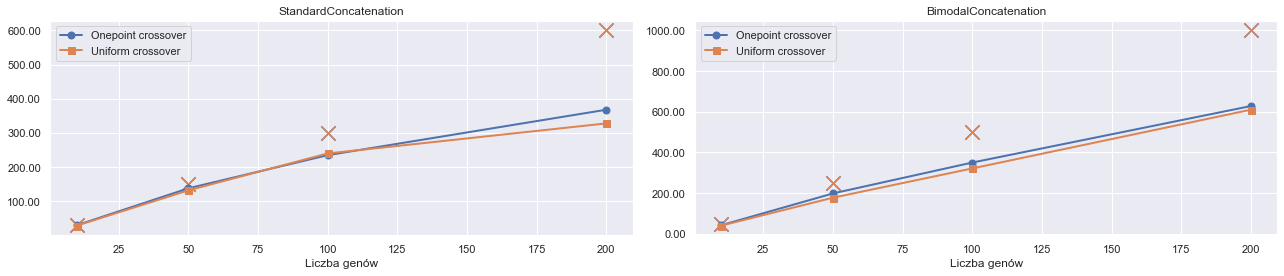

bestTime


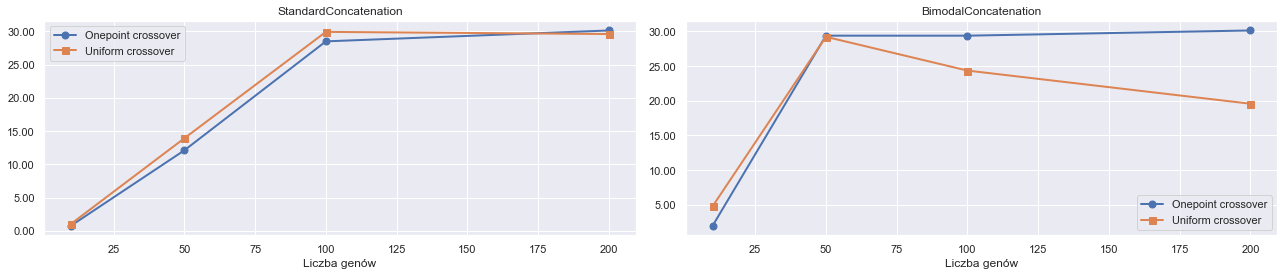

bestIteration


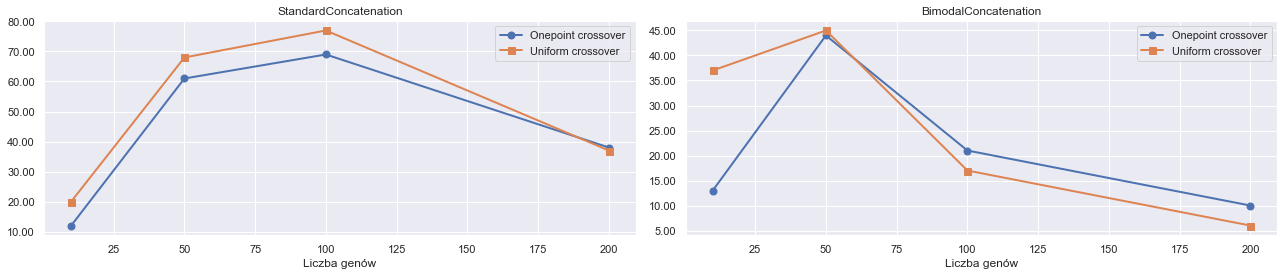

bestFFE


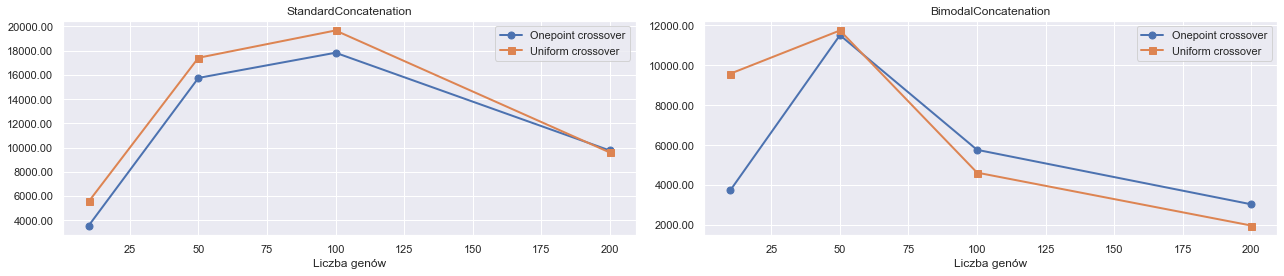

In [68]:
problem_names = {
                 'StandardConcatenation': 'StandardConcatenation',
                 'BimodalConcatenation': 'BimodalConcatenation'
                }


model_names = {
    'lab7zad1_onepoint': 'Onepoint crossover',
    'lab7zad1_uniform': 'Uniform crossover',    
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics(71, problem_names, model_names, metrics)

## Lab 7 zad 2

FileNotFoundError: [Errno 2] No such file or directory: '../Results/zad_72_RandomStandardConcatenation.csv'

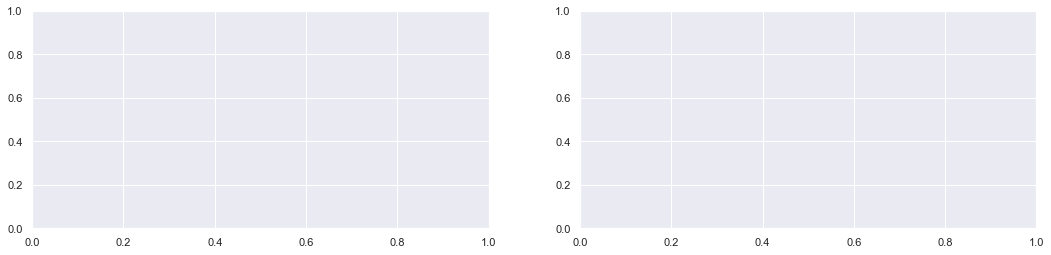

In [71]:
problem_names = {
                 'RandomStandardConcatenation': 'RandomStandardConcatenation',
                 'RandomBimodalConcatenation': 'RandomBimodalConcatenation'
                }


model_names = {
    'lab7zad2_onepoint': 'Onepoint crossover',
    'lab7zad2_uniform': 'Uniform crossover',    
}

metrics = ['bestValue', 'bestTime', 'bestIteration', 'bestFFE']

plot_metrics(72, problem_names, model_names, metrics)